In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence/NV_759.mp4
/kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence/NV_564.mp4
/kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence/NV_126.mp4
/kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence/NV_601.mp4
/kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence/NV_397.mp4
/kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence/NV_782.mp4
/kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence/NV_143.mp4
/kaggle/input/real-life-violence-situations-dataset/real life violence situa

In [2]:
import os
import shutil
import cv2
import math
import random
import numpy as np
import datetime as dt
import tensorflow 
import keras
from collections import deque
import matplotlib.pyplot as plt
plt.style.use("seaborn")
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
import imageio
import imgaug.augmenters as iaa
import imgaug as ia

In [4]:
from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

In [5]:
from IPython.display import HTML
from base64 import b64encode

# To Show a Video in Notebook
def Play_Video(filepath,selected_class):
    video_reader = cv2.VideoCapture(filepath)
    _, bgr_frame = video_reader.read()
    video_reader.release()
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
    cv2.putText(rgb_frame, selected_class, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    return rgb_frame

In [7]:
# Classes Directories
NonViolenceVideos_Dir = "../input/real-life-violence-situations-dataset/Real Life Violence Dataset/NonViolence/"
ViolenceVideos_Dir = "../input/real-life-violence-situations-dataset/Real Life Violence Dataset/Violence/"

# Retrieve the list of all the video files present in the Class Directory.
NonViolence_files_names_list = os.listdir(NonViolenceVideos_Dir)
Violence_files_names_list = os.listdir(ViolenceVideos_Dir)

# Randomly select a video file from the Classes Directory.
Random_NonViolence_Video = random.choice(NonViolence_files_names_list)
Random_Violence_Video = random.choice(Violence_files_names_list)

(-0.5, 193.5, 297.5, -0.5)

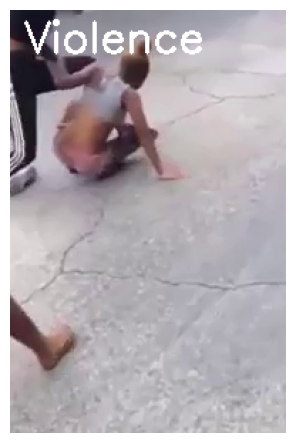

In [8]:
frame = Play_Video(f"{ViolenceVideos_Dir}/{Random_Violence_Video}",'Violence')
plt.imshow(frame);
plt.axis('off')

(-0.5, 223.5, 223.5, -0.5)

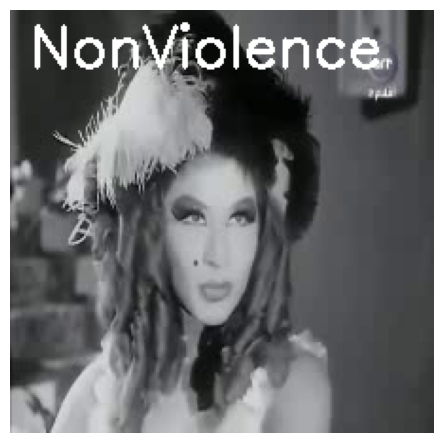

In [9]:
frame = Play_Video(f"{NonViolenceVideos_Dir}/{Random_NonViolence_Video}",'NonViolence')
plt.imshow(frame);
plt.axis('off')

In [10]:
IMAGE_HEIGHT , IMAGE_WIDTH = 128, 128
 
# Specify the number of frames of a video that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 20
 

DATASET_DIR = "../input/real-life-violence-situations-dataset/Real Life Violence Dataset/"
 
CLASSES_LIST = ["NonViolence","Violence"]

In [11]:
def frames_extraction(video_path):
    frames_list = []
    # Read the Video File
    video_reader = cv2.VideoCapture(video_path)
    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    # Calculate the the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)
    # Iterate through the Video Frames.
    for frame_counter in range(SEQUENCE_LENGTH):
        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
        # Reading the frame from the video. 
        success, image = video_reader.read() 
        # Apply image augmentation
        #flip = iaa.Fliplr(1.0)
        zoom = iaa.Affine(scale=1.3)
        random_brightness = iaa.Multiply((1, 1.3))
        #rotate = iaa.Affine(rotate=(-25, 25))  
        #image_aug = flip(image = image)
        image_aug = random_brightness(image = image)
        image_aug = zoom(image = image_aug)
        #image_aug = rotate(image = image_aug)
        if not success:
            break
 
        # Resize the Frame to fixed height and width.
        resized_frame = cv2.resize(image_aug, (IMAGE_HEIGHT, IMAGE_WIDTH))
        # Normalize the resized frame
        normalized_frame = resized_frame / 255
        # Append the normalized frame into the frames list
        frames_list.append(normalized_frame)
    
    video_reader.release()
 
    return frames_list

In [12]:
def create_dataset():
    features = []
    labels = []
    video_files_paths = []
    # Iterating through all the classes.
    for class_index, class_name in enumerate(CLASSES_LIST):
        print(f'Extracting Data of Class: {class_name}')
        # Get the list of video files present in the specific class name directory.
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
        # Iterate through all the files present in the files list.
        # 
        for file_name in files_list[:500]: # specific number video per class
            # Get the complete video path.
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)
            # Extract the frames of the video file.
            frames = frames_extraction(video_file_path)
            # Check if the extracted frames are equal to the SEQUENCE_LENGTH specified.
            # So ignore the vides having frames less than the SEQUENCE_LENGTH.
            if len(frames) == SEQUENCE_LENGTH:
                # Append the data to their repective lists.
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)
 
    features = np.asarray(features)
    labels = np.array(labels)  

    return features, labels, video_files_paths

In [13]:
features, labels, video_files_paths = create_dataset()

Extracting Data of Class: NonViolence


[h264 @ 0x5c9869ed17c0] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5c9869ed17c0] error while decoding MB 98 31
[h264 @ 0x5c9869ed17c0] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5c9869ed17c0] error while decoding MB 98 31
[h264 @ 0x5c9869ed17c0] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5c9869ed17c0] error while decoding MB 98 31
[h264 @ 0x5c9869ed17c0] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5c9869ed17c0] error while decoding MB 98 31


Extracting Data of Class: Violence


In [14]:
# Saving the extracted data
np.save("features.npy",features)
np.save("labels.npy",labels)
np.save("video_files_paths.npy",video_files_paths)

In [15]:
#features, labels, video_files_paths = np.load("features.npy") , np.load("labels.npy") ,  np.load("video_files_paths.npy")